In [168]:
#IMPORTING PREREQUISITES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm, skew 
from scipy import stats 

In [169]:
df=pd.read_csv('https://raw.githubusercontent.com/rajitnair9/Datasets/main/data_product.csv')
df.head()

,date,store,product,sales
0,2013-01-01,1,pineapple,11
1,2013-01-02,1,pineapple,6
2,2013-01-03,1,pineapple,8
3,2013-01-04,1,pineapple,9
4,2013-01-05,1,pineapple,8


In [170]:
df.shape

(200860, 4)

In [171]:
df.dtypes

date       object
store       int64
product    object
sales       int64
dtype: object

In [172]:
df.isna().sum()

date       0
store      0
product    0
sales      0
dtype: int64

In [173]:
res=df
res['product']=res['product'].astype('category')
clist=list(res['product'].cat.categories)
clist

['ananas',
 'beef',
 'biscuit',
 'brownie',
 'chocolate',
 'green_bean',
 'leechee',
 'muesli',
 'pineapple',
 'puffed_wheat',
 'smoked_salmon']

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


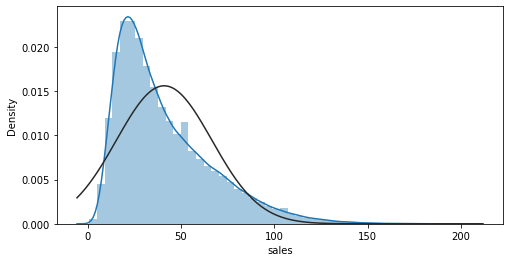

In [174]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,4
sns.distplot(df['sales'], fit=norm)

In [175]:
df['product'].value_counts().sort_values(ascending = False)

ananas           18260
beef             18260
biscuit          18260
brownie          18260
chocolate        18260
green_bean       18260
leechee          18260
muesli           18260
pineapple        18260
puffed_wheat     18260
smoked_salmon    18260
Name: product, dtype: int64

In [176]:
data = df[['date', 'sales']]
data.head()

,date,sales
0,2013-01-01,11
1,2013-01-02,6
2,2013-01-03,8
3,2013-01-04,9
4,2013-01-05,8


In [177]:
df.groupby('product').sum().sort_values('sales', ascending = False)

,store,sales
product,,
chocolate,100430,1471467
ananas,100430,1205975
biscuit,100430,1070764
leechee,100430,938379
brownie,100430,869981
beef,100430,536811
puffed_wheat,100430,534094
smoked_salmon,100430,469935
muesli,100430,402628


In [178]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
data.set_index('date',inplace=True)

In [180]:
data.head(13)

,sales
date,
2013-01-01,11
2013-01-02,6
2013-01-03,8
2013-01-04,9
2013-01-05,8
2013-01-06,13
2013-01-07,11
2013-01-08,10
2013-01-09,7


In [181]:
df.head()

,date,store,product,sales
0,2013-01-01,1,pineapple,11
1,2013-01-02,1,pineapple,6
2,2013-01-03,1,pineapple,8
3,2013-01-04,1,pineapple,9
4,2013-01-05,1,pineapple,8


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200860 entries, 0 to 200859
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   date     200860 non-null  object  
 1   store    200860 non-null  int64   
 2   product  200860 non-null  category
 3   sales    200860 non-null  int64   
dtypes: category(1), int64(2), object(1)
memory usage: 4.8+ MB


## EDA PLOTS

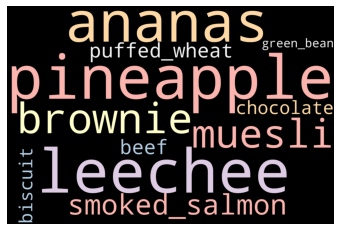

In [183]:
from wordcloud import WordCloud, STOPWORDS
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="black",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(','.join(df['product']))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

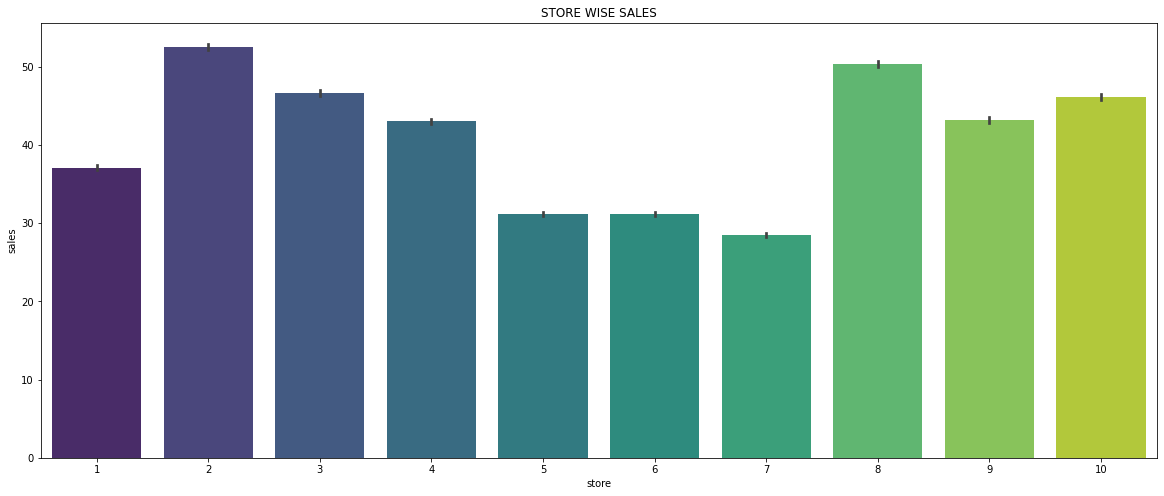

In [184]:
plt.figure(figsize=(20,8))

plt.title('STORE WISE SALES')
sns.barplot(x=df['store'], y=df['sales'], palette=("viridis"))

plt.show()

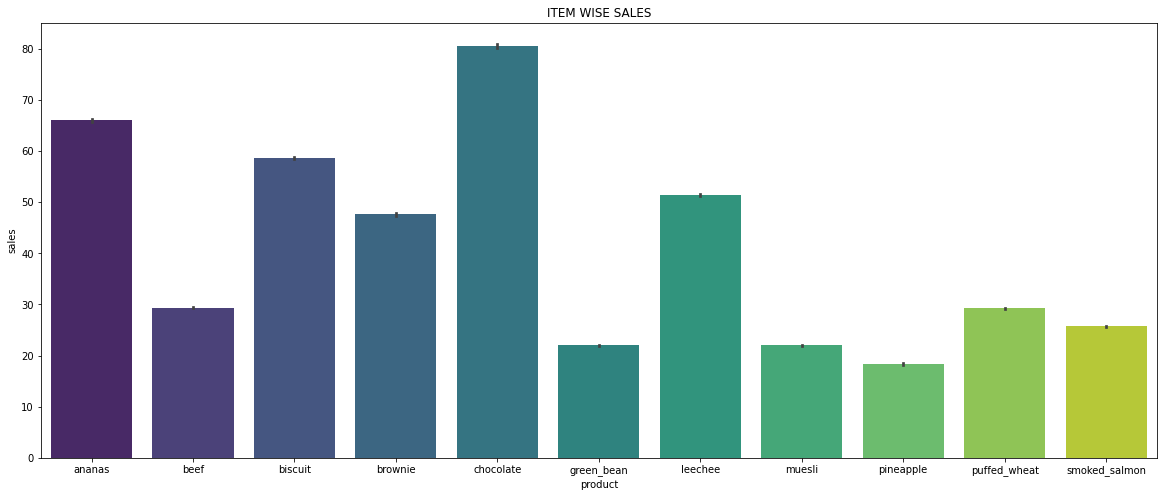

In [185]:
plt.figure(figsize=(20,8))

plt.title('ITEM WISE SALES')
sns.barplot(x=df['product'], y=df['sales'], palette=("viridis"))

plt.show()

In [186]:
df['date']=pd.to_datetime(df['date'])

In [187]:
df.set_index('date',inplace=True)

In [188]:
dsm=df.resample('M').sum()
dsm.drop(['store'], axis=1,inplace=True)
dsm.head(13)

,sales
date,
2013-01-31,78389
2013-02-28,79165
2013-03-31,107069
2013-04-30,117519
2013-05-31,132295
2013-06-30,137493
2013-07-31,147833
2013-08-31,132211
2013-09-30,119369


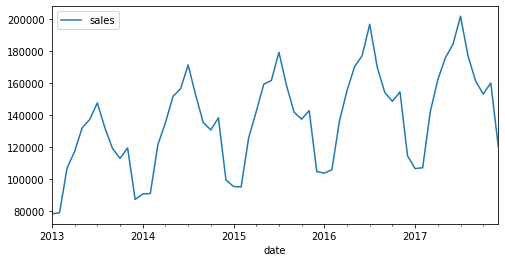

In [189]:
dsm.plot()

In [190]:
dsm.shape

(60, 1)

In [191]:
# Decompose the timeseries into 4 components
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dsm, model='additive')

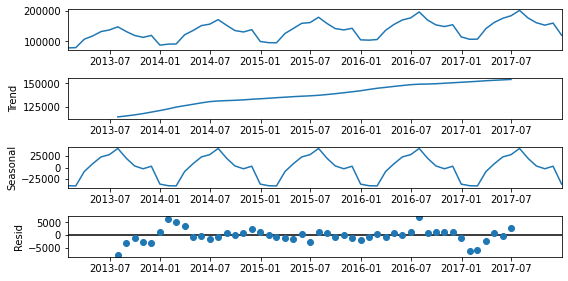

In [192]:
fig = decomposition.plot()

In [193]:
from statsmodels.tsa.stattools import adfuller

In [194]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [195]:
adf_test(dsm['sales'])

ADF Statistics: -5.155362619968049
p- value: 1.0837230589105266e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


# Checking Auto Correlation

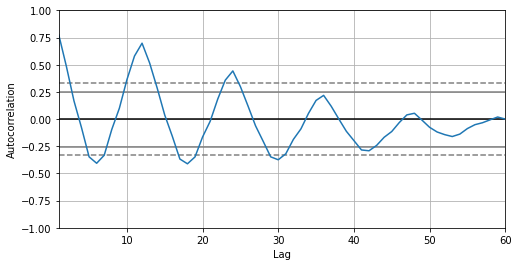

In [196]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dsm['sales'])
plt.show()

In [197]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


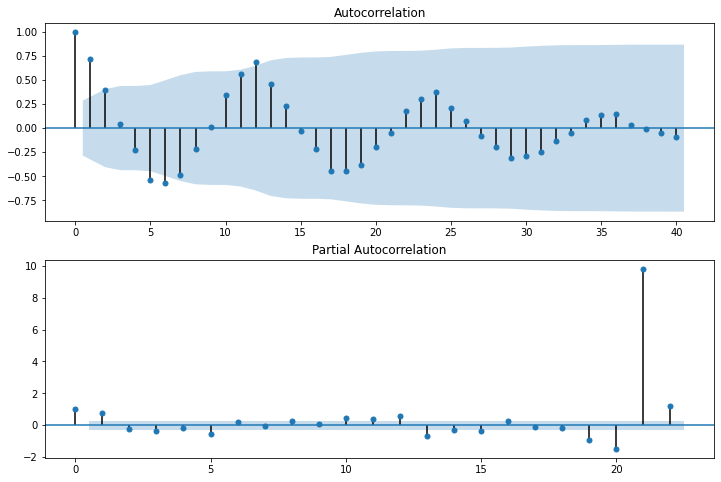

In [198]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dsm['sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dsm['sales'].iloc[13:],lags=22,ax=ax2)

# Applying Arima Model

In [199]:
from statsmodels.tsa.arima_model import ARIMA

In [200]:
mod1=ARIMA(dsm['sales'],order=(1,1,1))
mod1_fit=mod1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [201]:
mod1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -661.998
Method:                       css-mle   S.D. of innovations          18050.632
Date:                Mon, 14 Nov 2022   AIC                           1331.996
Time:                        10:18:17   BIC                           1340.306
Sample:                    02-28-2013   HQIC                          1335.240
                         - 12-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           479.0972   3128.242      0.153      0.878   -5652.144    6610.338
ar.L1.D.sales     0.3869      0.333      1.161      0.246      -0.266       1.040
ma.L1.D.sales    -0.1794      0.339     -0.529      0.597      -0.844       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5844           +0.0000j            2.5844            0.0000
MA.1            5.5735           +0.0000j            5.5735            0.0000
-----------------------------------------------------------------------------
"""

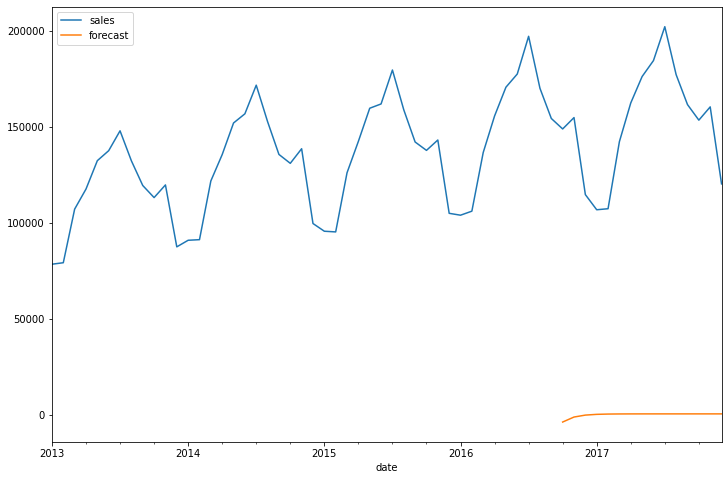

In [202]:
dsm['forecast']=mod1_fit.predict(start=45,end=60,dynamic=True)
dsm[['sales','forecast']].plot(figsize=(12,8))

# Applying Sarimax

In [203]:
import statsmodels.api as sm

In [204]:
mod2=sm.tsa.statespace.SARIMAX(dsm['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
mod2_fit=mod2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


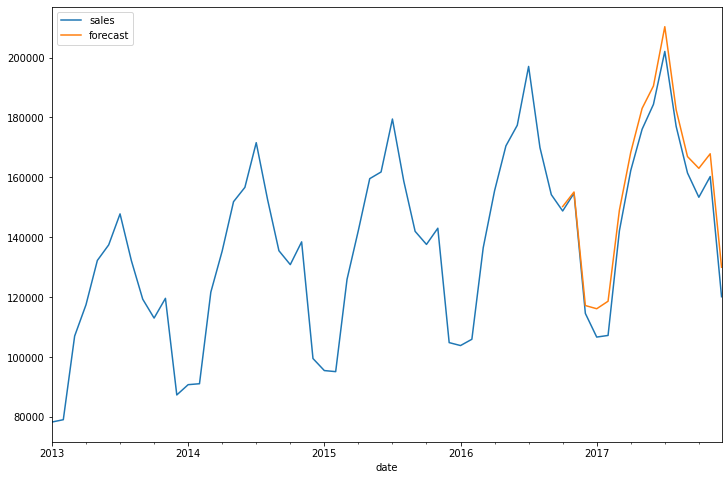

In [205]:
dsm['forecast']=mod2_fit.predict(start=45,end=60,dynamic=True)
dsm[['sales','forecast']].plot(figsize=(12,8))

## Predicting future sales using SARIMAX

In [206]:
from pandas.tseries.offsets import DateOffset
future_dates=[dsm.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [207]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dsm.columns)

In [208]:
future_datest_df.tail()

,sales,forecast
2019-07-31,NaN,NaN
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [209]:
future_df=pd.concat([dsm,future_datest_df])

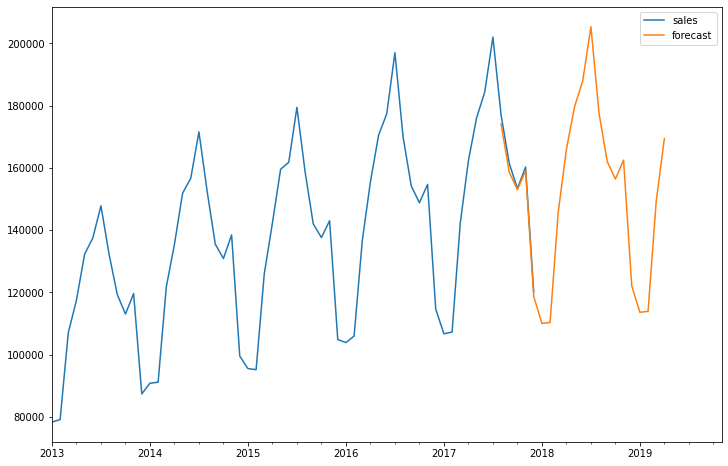

In [210]:
future_df['forecast'] = mod2_fit.predict(start = 55 , end =75 , dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8))

# LSTM

In [211]:
data1=pd.read_csv('https://raw.githubusercontent.com/rajitnair9/Datasets/main/data_product.csv')

In [212]:
data1=data1.loc[:,["date","sales"]]

In [213]:
data1["date"]=pd.to_datetime(data1["date"])

In [214]:
data1.set_index("date")

,sales
date,
2013-01-01,11
2013-01-02,6
2013-01-03,8
2013-01-04,9
2013-01-05,8
...,...
2017-12-27,16
2017-12-28,21
2017-12-29,18


In [215]:
data1=data1.groupby("date").sum()

In [216]:
data1.head(13)

,sales
date,
2013-01-01,2312
2013-01-02,2277
2013-01-03,2488
2013-01-04,2679
2013-01-05,2746
2013-01-06,3006
2013-01-07,2003
2013-01-08,2347
2013-01-09,2360


In [217]:
data1.shape

(1826, 1)

In [218]:
from datetime import datetime,timedelta
train_end1=datetime(2017,12,20)
test_end1=datetime(2017,12,31)
train_data1=data1.loc[:train_end1,:]
test_data1=data1.loc[timedelta(days=1)+train_end1:test_end1,:]

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
std=StandardScaler()

In [221]:
scale_std_train=std.fit_transform(train_data1)

In [222]:
scale_std_train

array([[-1.97776713],
       [-2.00920014],
       [-1.81970402],
       ...,
       [-1.30330466],
       [-0.89557368],
       [-0.86234451]])

In [223]:
scale_std_test=std.transform(test_data1)

In [224]:
from statsmodels.tsa.seasonal import seasonal_decompose

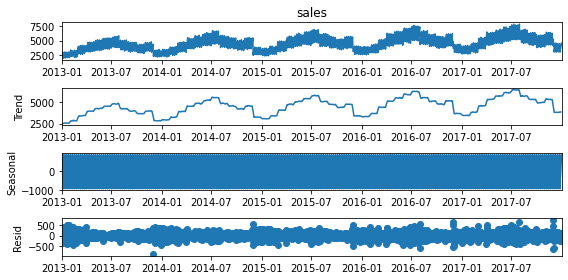

In [225]:
results = seasonal_decompose(data1['sales'])
results.plot();

In [226]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [227]:
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scale_std_train, scale_std_train, length=n_input, batch_size=1)

In [228]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[-1.97776713 -2.00920014 -1.81970402 -1.64816963 -1.58799788 -1.35449555
 -2.25527566 -1.94633413 -1.93465901 -1.77210547]
Predict this y: 
 [[-1.63469834]]


In [229]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [230]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [231]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [232]:
lstm_model.fit(generator,epochs=20)

Epoch 1/20
1805/1805 [==============================] - 14s 7ms/step - loss: 0.3441
Epoch 2/20
1805/1805 [==============================] - 13s 7ms/step - loss: 0.1459
Epoch 3/20
1805/1805 [==============================] - 12s 7ms/step - loss: 0.0528
Epoch 4/20
1805/1805 [==============================] - 12s 7ms/step - loss: 0.0422
Epoch 5/20
1805/1805 [==============================] - 12s 7ms/step - loss: 0.0374
Epoch 6/20
1805/1805 [==============================] - 13s 7ms/step - loss: 0.0296
Epoch 7/20
1805/1805 [==============================] - 12s 7ms/step - loss: 0.0301
Epoch 8/20
1805/1805 [==============================] - 12s 7ms/step - loss: 0.0278
Epoch 9/20
1805/1805 [==============================] - 13s 7ms/step - loss: 0.0239
Epoch 10/20
1805/1805 [==============================] - 12s 7ms/step - loss: 0.0225
Epoch 11/20
1805/1805 [==============================] - 12s 7ms/step - loss: 0.0258
Epoch 12/20
1805/1805 [==============================] - 12s 7ms/step - lo

In [233]:
last_train_batch = scale_std_train[-10:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [234]:
lstm_model.predict(last_train_batch)

1/1 [==============================] - 0s 191ms/step


array([[-0.6295336]], dtype=float32)

In [235]:
scale_std_test[0]

array([-0.6027977])

In [236]:
test_predictions = []

first_eval_batch = scale_std_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(scale_std_test[:11])):
  current_pred = lstm_model.predict(current_batch)[0]
  test_predictions.append(current_pred) 
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_predictions

1/1 [==============================] - 0s 21ms/step


[array([-0.6295336], dtype=float32),
 array([-0.37007993], dtype=float32),
 array([-0.11833718], dtype=float32),
 array([0.12710151], dtype=float32),
 array([-1.3530029], dtype=float32),
 array([-0.8728462], dtype=float32),
 array([-0.8447971], dtype=float32),
 array([-0.61086345], dtype=float32),
 array([-0.34286326], dtype=float32),
 array([-0.08280493], dtype=float32),
 array([0.17046139], dtype=float32)]

In [237]:
og_pred=std.inverse_transform(test_predictions)

og_pred

array([[3813.230138  ],
       [4102.1264101 ],
       [4382.43675038],
       [4655.72765544],
       [3007.6620329 ],
       [3542.30659869],
       [3573.53870344],
       [3834.01895422],
       [4132.43161185],
       [4422.00117618],
       [4704.00797925]])

In [238]:
df1=test_data1
df1["pred_sales"]=og_pred
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sales,pred_sales
date,,
2017-12-21,3843,3813.230138
2017-12-22,4086,4102.126410
2017-12-23,4293,4382.436750
2017-12-24,4472,4655.727655
2017-12-25,3038,3007.662033


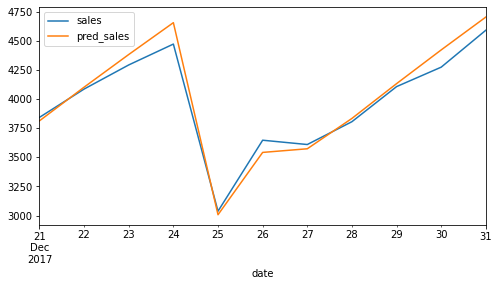

In [239]:
df1.plot()

In [241]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df1['sales'],df1['pred_sales']))
print(rmse)

91.561502604035
